In [69]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from random import random, seed
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
'''
fig = plt.figure()
ax = fig.add_subplot(projection='3d') #

# Make data.
x = np.arange(0, 1, 0.05)
y = np.arange(0, 1, 0.05)
x, y = np.meshgrid(x,y)
'''

def R2(y_data, y_model): #score function
    return 1 - np.sum((y_data - y_model) ** 2) / np.sum((y_data - np.mean(y_data)) ** 2)
def MSE(y_data,y_model): #mean square error
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n

def FrankeFunction(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4

'''
z = FrankeFunction(x, y)
# Plot the surface.
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm,
linewidth=0, antialiased=False)
# Customize the z axis.
ax.set_zlim(-0.10, 1.40)
'''

'\nz = FrankeFunction(x, y)\n# Plot the surface.\nsurf = ax.plot_surface(x, y, z, cmap=cm.coolwarm,\nlinewidth=0, antialiased=False)\n# Customize the z axis.\nax.set_zlim(-0.10, 1.40)\n'

In [88]:
#from lecture notes on Ridge/Lasso regression
def create_X(x, y, n):
    if len(x.shape) > 1:
        x = np.ravel(x)
        y = np.ravel(y)

    N = len(x)
    l = int((n+1)*(n+2)/2) # Number of elements in beta
    X = np.ones((N,l))

    for i in range(1,n+1):
        q = int((i)*(i+1)/2)
        for k in range(i+1):
            X[:,q+k] = (x**(i-k))*(y**k)
    return X


# Making meshgrid of datapoints and compute Franke's function
n = 5
N = 100
x = np.linspace(0,1,N)
y = np.linspace(0,1,N)
x,y = np.meshgrid(x,y)

noise = np.random.normal(0, 0.1, len(x)*len(x)) #
noise = noise.reshape(len(x),len(x)) #why?

z = FrankeFunction(x, y) + noise #Franke with noise
X = create_X(x, y, n=n)

<IPython.core.display.Javascript object>


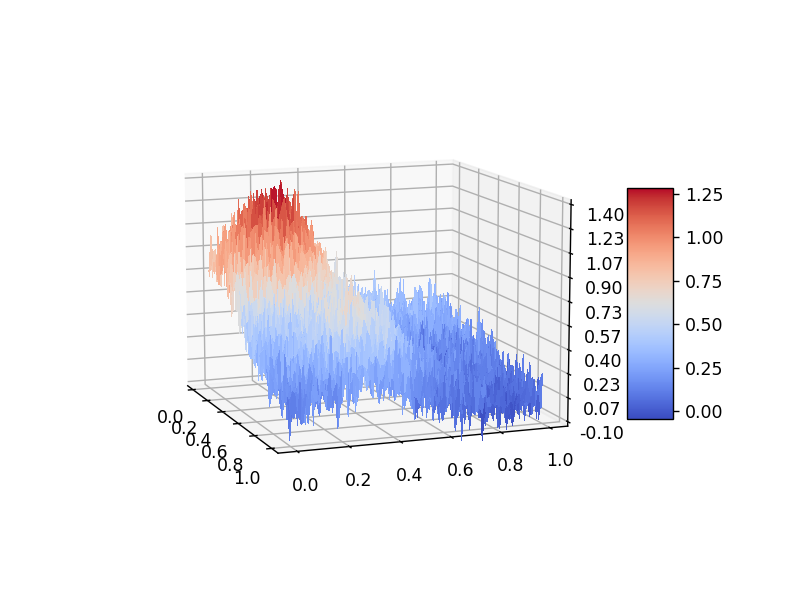

In [89]:
%matplotlib notebook

# Plot the surface.
fig = plt.figure()
ax = fig.add_subplot(projection='3d') #


surf = ax.plot_surface(x, y, z, cmap = cm.coolwarm,
linewidth = 0, antialiased = False)

#predict_surf = ax.plot_trisurf(x, y, zpredict, cmap = cm.coolwarm,
#linewidth = 0, antialiased = False)
# Customize the z axis.
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

In [90]:
# We split the data in test and training data, 20%
X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.2)

# matrix inversion to find beta
beta = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ z_train
print(beta)

ValueError: Found input variables with inconsistent numbers of samples: [10000, 100]

In [91]:
#scikit 
linreg = LinearRegression()
linreg.fit(X,z)

#xnew = np.array([[0],[1]])
zpredict = linreg.predict(X)


# and then make the prediction
ztilde = X_train @ beta
print("Training R2")
print(R2(z_train, ztilde))
print("Training MSE")
print(MSE(z_train, ztilde))

zpredict = X_test @ beta
print("Test R2")
print(R2(z_test, zpredict))
print("Test MSE")
print(MSE(z_test, zpredict))

ValueError: Found input variables with inconsistent numbers of samples: [10000, 100]